# **Surrounding population and distance between provinces**

### Import packages

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib as mpl

### Import data set

In [2]:
distance_data = pd.read_csv("Distances.csv")   ###  This data set includes distances between each province
population_data = pd.read_csv("Population_2020.csv")  #### This data set includes population data in 2020 for each province

### Algorithem

In [3]:
provinces = distance_data['Province']

surrounding_population = np.zeros((9,9))  ### This matrix use to include surrounding population for each patche


for i in range(0,9):
  center = distance_data[str(provinces[i])]  ### center of the circle (origin) 
  for j in range(0,9):
    print("origin = "f'{provinces[i]}',"province and destionation = "f'{provinces[j]}',"province")  ### origin and destination
    print("********************************************************************")
    if j==i:               
      surrounding_population[i][j] = 0   ### if origin is same as the destination then surrounding population is zero
    else:
      for k in range(0,9):  
        if k==i or k==j:
          pass        ### origin and destinatio populations are not count when find the surrounding population
        else:
          if center[k]<=center[j]:  ### define the boundry of circle
            surrounding_population[i][j] = surrounding_population[i][j]+ population_data["Population"][k]
            print(provinces[k],population_data['Population'][k])    ### name and population of surrounding patches
          else:
            pass
    print("Surounding population: ",surrounding_population[i][j]," in thousands")    ### surrounding population in thousands
    print("")

origin = Central province and destionation = Central province
********************************************************************
Surounding population:  0.0  in thousands

origin = Central province and destionation = Eastern province
********************************************************************
North central 1386
North western 2563
Sabaragamuwa 2070
Uva 1387
Western 6165
Surounding population:  13571.0  in thousands

origin = Central province and destionation = North central province
********************************************************************
North western 2563
Sabaragamuwa 2070
Uva 1387
Western 6165
Surounding population:  12185.0  in thousands

origin = Central province and destionation = North western province
********************************************************************
Sabaragamuwa 2070
Uva 1387
Surounding population:  3457.0  in thousands

origin = Central province and destionation = Northern province
******************************************************

### Surrounding patches matrix

In [4]:
print(surrounding_population)  ### This matrix gives the surrounding population in thousands

[[    0. 13571. 12185.  3457. 17986.     0. 15317.  2070.  6020.]
 [ 2773.     0.  1387.  5554. 19021.  8117. 16352.     0. 10187.]
 [ 2563.  5344.     0.     0.  7090.  9629. 17864.  8242. 11699.]
 [    0. 13789.  8946.     0. 18204. 10332. 15535. 12402.  2781.]
 [ 5695.  3949.     0.  1386.     0. 14641. 18098. 16711.  8476.]
 [    0. 16951. 15565. 13002. 18697.     0. 10333.  8946.  2781.]
 [ 9622. 14966. 16712. 12403. 18098.     0.     0.  8235.  2070.]
 [    0.  4851. 17994. 15431. 19380.  2781.  6597.     0.  9266.]
 [ 4633. 12856. 11470.  2070. 14602.     0.  7414. 10083.     0.]]


### Heatmap of surrounding population

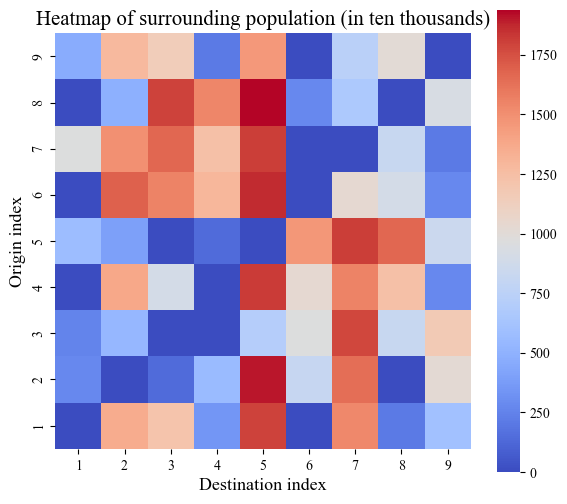

In [5]:
destination_index = [1,2,3,4,5,6,7,8,9]
origin_index = [9,8,7,6,5,4,3,2,1]

surrounding_population_heat_map = np.zeros((9,9))
for i in range(0,9):
    surrounding_population_heat_map[8-i] = surrounding_population[i]/10
    

mpl.rcParams['font.family'] = 'Times New Roman' 
plt.figure(figsize = (6.7,6))
sns.heatmap(surrounding_population_heat_map,cmap = 'coolwarm',square=True,xticklabels=destination_index,yticklabels=origin_index)
plt.xlabel("Destination index",fontsize = 13)
plt.ylabel("Origin index",fontsize = 13)
plt.title("Heatmap of surrounding population (in ten thousands)",fontsize = 15)
plt.show()

### Heatmap of distance between provinces

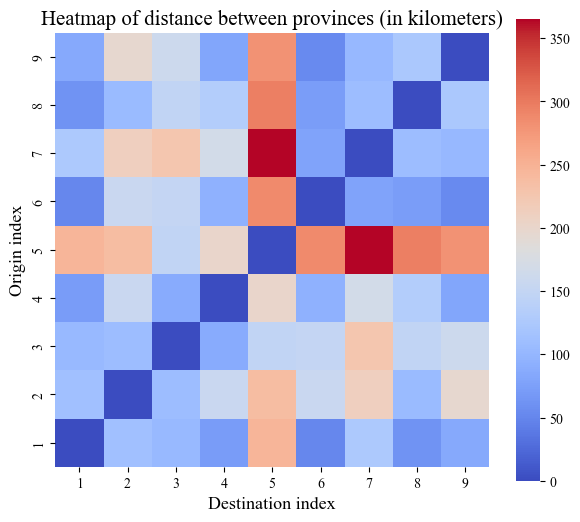

In [6]:
destination_index = [1,2,3,4,5,6,7,8,9]
origin_index = [9,8,7,6,5,4,3,2,1]

distance_heat_map = np.zeros((9,9))
distance_heat_map[0] = distance_data['Western']
distance_heat_map[1] = distance_data['Uva']
distance_heat_map[2] = distance_data['Southern']
distance_heat_map[3] = distance_data['Sabaragamuwa']
distance_heat_map[4] = distance_data['Northern']
distance_heat_map[5] = distance_data['North western']
distance_heat_map[6] = distance_data['North central']
distance_heat_map[7] = distance_data['Eastern']
distance_heat_map[8] = distance_data['Central']


distance_heat_map_km = distance_heat_map/1000


mpl.rcParams['font.family'] = 'Times New Roman' 
plt.figure(figsize = (7,6))
sns.heatmap(distance_heat_map_km,cmap='coolwarm',square=True,xticklabels=destination_index,yticklabels=origin_index)
plt.xlabel("Destination index",fontsize = 13)
plt.ylabel("Origin index",fontsize = 13)
plt.title("Heatmap of distance between provinces (in kilometers)",fontsize = 15)
plt.show()